In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from gc import collect as collect_garbage
from psutil import virtual_memory
from os import scandir

In [2]:
%matplotlib widget

In [3]:
df = pd.read_csv("04-imputed-rr-intervals/rr_intervals_imputed_1.csv")

In [5]:
df

,time,interval
0,8.640011e+05,0.371237
1,8.640015e+05,0.362066
2,8.640019e+05,0.373514
3,8.640023e+05,0.381606
4,8.640026e+05,0.371040
...,...,...
2098416,1.641598e+06,0.376226
2098417,1.641599e+06,0.382623
2098418,1.641599e+06,0.368281
2098419,1.641599e+06,0.358440


In [6]:
df["datetime"] = pd.to_datetime(df["time"], unit="s")

In [7]:
df.set_index(df["datetime"], inplace=True)

In [8]:
df.drop("datetime", inplace=True, axis=1)

In [9]:
df

,time,interval
datetime,,
1970-01-11 00:00:01.144241094,8.640011e+05,0.371237
1970-01-11 00:00:01.506306648,8.640015e+05,0.362066
1970-01-11 00:00:01.879820585,8.640019e+05,0.373514
1970-01-11 00:00:02.261426925,8.640023e+05,0.381606
1970-01-11 00:00:02.632466554,8.640026e+05,0.371040
...,...,...
1970-01-19 23:59:58.286208152,1.641598e+06,0.376226
1970-01-19 23:59:58.668831110,1.641599e+06,0.382623
1970-01-19 23:59:59.037111997,1.641599e+06,0.368281


In [10]:
df["successive difference"] = df["interval"].diff()

In [11]:
df["abs successive difference"] = abs(df["successive difference"])

In [12]:
# This cell marks the beginning of the calculation for RMSSD
df["squared succ diff"] = df["successive difference"]**2

In [13]:
df["test MSSD"] = df["squared succ diff"].rolling("5min").mean()

In [20]:
df["rmssd"] = np.sqrt(df["test MSSD"])

In [25]:
df.drop(["squared succ diff", "test MSSD"], inplace=True, axis=1)
collect_garbage()
# This cell marks the end of the calculation of RMSSD

In [26]:
df

,time,interval,successive difference,abs successive difference,rmssd
datetime,,,,,
1970-01-11 00:00:01.144241094,8.640011e+05,0.371237,NaN,NaN,NaN
1970-01-11 00:00:01.506306648,8.640015e+05,0.362066,-0.009171,0.009171,0.009171
1970-01-11 00:00:01.879820585,8.640019e+05,0.373514,0.011448,0.011448,0.010372
1970-01-11 00:00:02.261426925,8.640023e+05,0.381606,0.008092,0.008092,0.009672
1970-01-11 00:00:02.632466554,8.640026e+05,0.371040,-0.010567,0.010567,0.009904
...,...,...,...,...,...
1970-01-19 23:59:58.286208152,1.641598e+06,0.376226,0.016162,0.016162,0.011977
1970-01-19 23:59:58.668831110,1.641599e+06,0.382623,0.006397,0.006397,0.011973
1970-01-19 23:59:59.037111997,1.641599e+06,0.368281,-0.014342,0.014342,0.011972


In [30]:
df.drop("successive difference", inplace=True, axis=1)
collect_garbage()
virtual_memory()

svmem(total=12655771648, available=2773680128, percent=78.1, used=9882091520, free=2773680128)

In [31]:
df

,time,interval,abs successive difference,rmssd
datetime,,,,
1970-01-11 00:00:01.144241094,8.640011e+05,0.371237,NaN,NaN
1970-01-11 00:00:01.506306648,8.640015e+05,0.362066,0.009171,0.009171
1970-01-11 00:00:01.879820585,8.640019e+05,0.373514,0.011448,0.010372
1970-01-11 00:00:02.261426925,8.640023e+05,0.381606,0.008092,0.009672
1970-01-11 00:00:02.632466554,8.640026e+05,0.371040,0.010567,0.009904
...,...,...,...,...
1970-01-19 23:59:58.286208152,1.641598e+06,0.376226,0.016162,0.011977
1970-01-19 23:59:58.668831110,1.641599e+06,0.382623,0.006397,0.011973
1970-01-19 23:59:59.037111997,1.641599e+06,0.368281,0.014342,0.011972


In [43]:
# This cell marks the beginning of the pNNk calculation
# IMPORTANT: Note that the RR intervals are measured in seconds, meaning that pNNk has cutoff k/1000
K = 20
df["over K"] = (df["abs successive difference"] > K/1000)

In [44]:
df["over K"].value_counts()

False    1846591
True      251830
Name: over K, dtype: int64

In [54]:
df["wincount"] = df["over K"].rolling("1H").count()

In [55]:
df["diffcount"] = df["over K"].rolling("1H").sum()

In [56]:
df["pNN" + str(K)] = df["diffcount"] / df["wincount"]

In [57]:
df

,time,interval,abs successive difference,rmssd,over K,wincount,diffcount,pNN20
datetime,,,,,,,,
1970-01-11 00:00:01.144241094,8.640011e+05,0.371237,NaN,NaN,False,1.0,0.0,0.000000
1970-01-11 00:00:01.506306648,8.640015e+05,0.362066,0.009171,0.009171,False,2.0,0.0,0.000000
1970-01-11 00:00:01.879820585,8.640019e+05,0.373514,0.011448,0.010372,False,3.0,0.0,0.000000
1970-01-11 00:00:02.261426925,8.640023e+05,0.381606,0.008092,0.009672,False,4.0,0.0,0.000000
1970-01-11 00:00:02.632466554,8.640026e+05,0.371040,0.010567,0.009904,False,5.0,0.0,0.000000
...,...,...,...,...,...,...,...,...
1970-01-19 23:59:58.286208152,1.641598e+06,0.376226,0.016162,0.011977,False,9418.0,331.0,0.035145
1970-01-19 23:59:58.668831110,1.641599e+06,0.382623,0.006397,0.011973,False,9418.0,331.0,0.035145
1970-01-19 23:59:59.037111997,1.641599e+06,0.368281,0.014342,0.011972,False,9418.0,331.0,0.035145


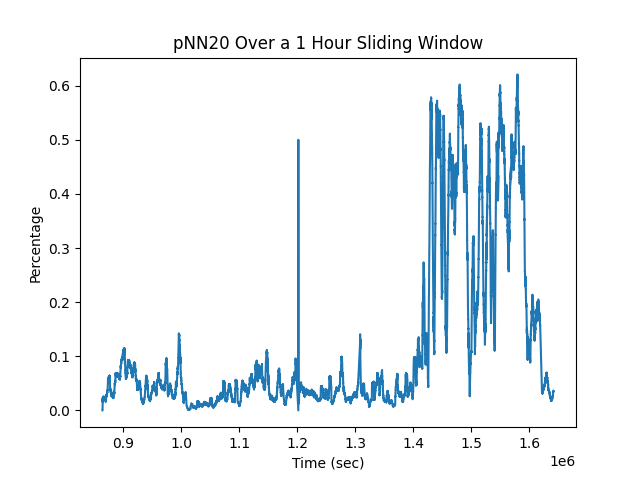

In [59]:
fig = plt.figure()
plt.plot(df["time"], df["pNN20"])
plt.title("pNN" + str(K) + " Over a 1 Hour Sliding Window")
plt.xlabel("Time (sec)")
plt.ylabel("Percentage")
plt.show()

In [29]:
virtual_memory()

svmem(total=12655771648, available=2866933760, percent=77.3, used=9788837888, free=2866933760)

In [9]:
df.rolling("3min").mean()

,interval
datetime,
1970-01-11 00:00:01.144241094,0.371237
1970-01-11 00:00:01.506306648,0.366651
1970-01-11 00:00:01.879820585,0.368939
1970-01-11 00:00:02.261426925,0.372106
1970-01-11 00:00:02.632466554,0.371892
...,...
1970-01-19 23:59:58.286208152,0.383027
1970-01-19 23:59:58.668831110,0.383003
1970-01-19 23:59:59.037111997,0.382972


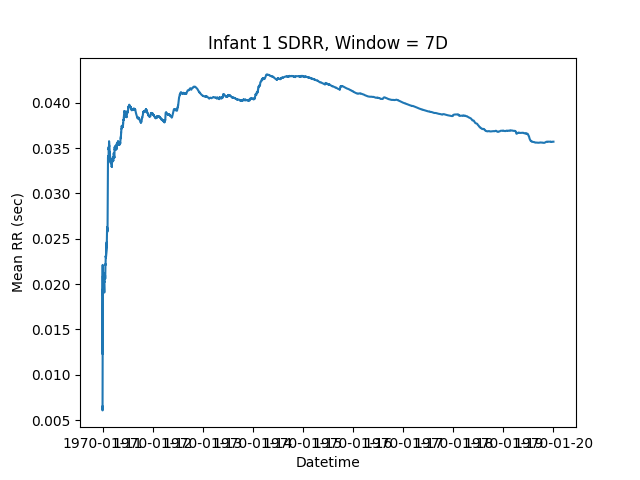

In [19]:
offset = "7D"
fig = plt.figure()
plt.plot(df.index, df.rolling(offset).std()["interval"])
plt.xlabel("Datetime")
plt.ylabel("Mean RR (sec)")
plt.title("Infant 1 SDRR, Window = " + offset)
plt.show()



In [35]:
virtual_memory()

svmem(total=12655771648, available=2840854528, percent=77.6, used=9814917120, free=2840854528)